In [1]:
import numpy as np
import pandas as pd

In [2]:
X = pd.read_csv('df_input_to_ga.csv')
target = pd.read_csv('../cleaned-data-frames/target-electricity-consumption.csv')

In [3]:
X.shape

(8759, 35)

In [4]:
# making the lengths the same

X = X*100000
X = X.iloc[0:7536,:]
X = X.drop(columns = 'Unnamed: 0')

In [5]:
X.columns

Index(['AWT26_Power(albany)', 'AWP_200_Power(albany)',
       'D2CF_200_Power(albany)', 'AN_Bonus_150/30_Power(albany)',
       'Aria_20_Power(albany)', 'WWD-1_D64_Power(albany)',
       'Solar_AllMax(albany)', 'Solar_TrinaSolar(albany)',
       'Solar_Mitsubishi(albany)', 'Solar_FirstSolar(albany)',
       'AWT26_Power(buffalo)', 'AWP_200_Power(buffalo)',
       'D2CF_200_Power(buffalo)', 'AN_Bonus_150/30_Power(buffalo)',
       'Aria_20_Power(buffalo)', 'WWD-1_D64_Power(buffalo)',
       'AWT26_Power(binghamton)', 'AWP_200_Power(binghamton)',
       'D2CF_200_Power(binghamton)', 'AN_Bonus_150/30_Power(binghamton)',
       'Aria_20_Power(binghamton)', 'WWD-1_D64_Power(binghamton)',
       'AWT26_Power(rochester)', 'AWP_200_Power(rochester)',
       'D2CF_200_Power(rochester)', 'AN_Bonus_150/30_Power(rochester)',
       'Aria_20_Power(rochester)', 'WWD-1_D64_Power(rochester)',
       'AWT26_Power(nyc)', 'AWP_200_Power(nyc)', 'D2CF_200_Power(nyc)',
       'AN_Bonus_150/30_Power(nyc)', '

In [6]:
X = X.loc[:,['AWT26_Power(albany)', 'AWP_200_Power(albany)',
       'D2CF_200_Power(albany)', 'AN_Bonus_150/30_Power(albany)',
       'Aria_20_Power(albany)', 'WWD-1_D64_Power(albany)',
       'Solar_AllMax(albany)', 'Solar_TrinaSolar(albany)',
       'Solar_Mitsubishi(albany)', 'Solar_FirstSolar(albany)',
       'AWT26_Power(nyc)', 'AWP_200_Power(nyc)', 'D2CF_200_Power(nyc)',
       'AN_Bonus_150/30_Power(nyc)', 'Aria_20_Power(nyc)',
       'WWD-1_D64_Power(nyc)']]

In [7]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

#X = clean_dataset(X)
#target = clean_dataset(target)

In [8]:
target_vector = target['Consumption']
input = X

In [9]:
target_vector

0       15417.0
1       14891.0
2       14506.0
3       14226.0
4       14211.0
         ...   
7531    17489.0
7532    16750.0
7533    15963.0
7534    15060.0
7535    14126.0
Name: Consumption, Length: 7536, dtype: float64

In [10]:
# recognising the solution space for this data:

magnitude_of_consumption_values = np.min(target['Consumption'])

magnitude_of_consumption_values

0.0

In [11]:
min_values = []
max_values = []

min = (5/X.iloc[13,:])
min = min.round(0)
min_values.append(min)

max = (2000/X.iloc[13,:])
max = max.round(0)
max_values.append(max)

In [12]:
# Defining the parameters for the genetic algorithm:

weights_size = len(input.iloc[0])

solutions_per_problem = 100

num_parents_mating = 4

num_generations = 500

pop_size = (solutions_per_problem, weights_size)
new_population = np.empty(shape= pop_size)

pop = []

for i in range(solutions_per_problem):
    for j in range(16):
        new_population[i][j] = np.random.randint(low = min_values[0][j], high= max_values[0][j])
    
    

In [13]:
X

,AWT26_Power(albany),AWP_200_Power(albany),D2CF_200_Power(albany),AN_Bonus_150/30_Power(albany),Aria_20_Power(albany),WWD-1_D64_Power(albany),Solar_AllMax(albany),Solar_TrinaSolar(albany),Solar_Mitsubishi(albany),Solar_FirstSolar(albany),AWT26_Power(nyc),AWP_200_Power(nyc),D2CF_200_Power(nyc),AN_Bonus_150/30_Power(nyc),Aria_20_Power(nyc),WWD-1_D64_Power(nyc)
0,1.363861,1.931757,4.397987,3.742286,0.364284,17.258314,0.0,0.0,0.0,0.0,7.801842,7.299661,12.179849,11.434579,0.788070,47.420652
1,1.363861,1.931757,4.397987,3.742286,0.364284,17.258314,0.0,0.0,0.0,0.0,7.801842,7.299661,12.179849,11.434579,0.788070,47.420652
2,1.166035,1.656589,4.070659,3.358453,0.344831,16.045043,0.0,0.0,0.0,0.0,7.406679,7.082857,11.746329,11.126056,0.765916,45.830501
3,1.363861,1.931757,4.397987,3.742286,0.364284,17.258314,0.0,0.0,0.0,0.0,7.406679,7.082857,11.746329,11.126056,0.765916,45.830501
4,1.363861,1.931757,4.397987,3.742286,0.364284,17.258314,0.0,0.0,0.0,0.0,7.406679,7.082857,11.746329,11.126056,0.765916,45.830501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7531,1.166035,1.656589,4.070659,3.358453,0.344831,16.045043,0.0,0.0,0.0,0.0,7.801842,7.299661,12.179849,11.434579,0.788070,47.420652
7532,0.981768,1.392086,3.736506,2.991296,0.325493,14.822125,0.0,0.0,0.0,0.0,7.406679,7.082857,11.746329,11.126056,0.765916,45.830501
7533,0.981768,1.392086,3.736506,2.991296,0.325493,14.822125,0.0,0.0,0.0,0.0,7.406679,7.082857,11.746329,11.126056,0.765916,45.830501
7534,0.981768,1.392086,3.736506,2.991296,0.325493,14.822125,0.0,0.0,0.0,0.0,6.623849,6.633747,10.864773,10.479921,0.721427,42.535321


In [14]:
# fitness of each population:

def cal_pop_fitness(target_dataframe, electricity_values, pop):
    # Calculating the fitness value of each solution in the current population.
    # The fitness function calculates the sum of products between each input and its corresponding weight.
    generated_electricity = np.sum(pop*electricity_values, axis=1);
    required_electricity =  target_vector
    error = required_electricity - generated_electricity
    error = error.abs()
    error = error.sum()
    fitness = 1/error
    
    return fitness


In [15]:
# Select the best parents for mating process:

def select_mating_pool(pop, fitness, number_of_parents):
    parents = np.empty((number_of_parents, new_population.shape[1]))

    for instance in range(number_of_parents):
        max_index = np.where(fitness == np.max(fitness))
        max_index = max_index[0][0]
        parents[instance, :] = pop[max_index, :]
        fitness[max_index] = -9999

    return parents

In [16]:
# The mating process with each parent

def crossover(parents, offspring_size):
    offspring = np.empty(offspring_size)
    # The point at which crossover takes place between two parents. Usually, it is at the center.
    
    # Choose mating (crossover) point randomly:
    
    division_point =  np.random.randint(low = 2, high= 4 )
    
    
    crossover_point = np.uint8(offspring_size[1]/ division_point )
 
    for k in range(offspring_size[0]):
        # Index of the first parent to mate.
        parent1_idx = k%parents.shape[0]
        # Index of the second parent to mate.
        parent2_idx = (k+1)%parents.shape[0]
        # The new offspring will have its  genes taken from the first parent.
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        # The new offspring will have its second half of its genes taken from the second parent.
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring

In [17]:
# Mutations on the offsprings:

mutation_probability = 40 # In percent

def mutation(offspring_crossover):
    
    offspring_operated = offspring_crossover

    # Mutation changes a single gene in each offspring randomly.
    
    prob = np.random.randint(low = 0, high = 100)
    
    # randomly select the indices that get mutated:
    
    indices_to_mutate = []
    
    for i in range(70):
        r = np.random.randint(0, solutions_per_problem - num_parents_mating - 2)
        if r not in indices_to_mutate: indices_to_mutate.append(r)
    
    if prob < mutation_probability :
        
        for idx in indices_to_mutate:

        # The random value to be added to the gene.

            random_value = np.random.randint(low = 0 , high= 5)
            
            # select the column to be mutated
            
            col = np.random.randint(low = 0, high = 15)

            offspring_operated[idx, col] = offspring_operated[idx, col] + random_value
                  

    return offspring_operated

In [18]:
# Running the GA on a for loop:

fitness = np.empty(new_population.shape[0])

best_fitnesses = []

best_populations = []

for generation in range(num_generations):
     # Measuring the fitness of each chromosome in the population.
        
    for i in range(len(new_population)):
        fitness[i] = cal_pop_fitness(target_vector,X, new_population[i])
        
    #print("Fitness")    
    #print(fitness)   
    
    #max_index_fitness = np.where(fitness == np.max(fitness))
    #max_fit = fitness[max_index_fitness]
    
    best_fitnesses.append(np.max(fitness))
    
    


    # The best result in the current iteration.
    #print("Best result : ", np.max(np.sum(new_population*XX1, axis=1)))
    
    # Selecting the best parents in the population for mating.
    
    max_index = np.where(fitness == np.max(fitness))
    
    best_populations.append(new_population[max_index])
    
    parents = select_mating_pool(new_population, fitness, 
                                       num_parents_mating)
        
    
    prob = np.random.randint(low = 0, high = 100)
    
    if prob < 5 :
        
        print("Parents")    
        print(parents)  
 
     # Generating next generation using crossover.
    offspring_crossover = crossover(parents,
                                        offspring_size=(pop_size[0]-parents.shape[0], weights_size))
    
    #print("offspring_crossover")    
    #print(offspring_crossover)
 
     # Adding some variations to the offsrping using mutation.
    offspring_mutation = mutation(offspring_crossover)
    
# Creating the new population based on the parents and offspring.
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation
    
    
    
    best_populations.append(new_population)
    
# Getting the best solution after iterating finishing all generations.
#At first, the fitness is calculated for each solution in the final generation.


for i in range(len(new_population)):
        fitness[i] = cal_pop_fitness(target_vector, X, new_population[i])
                
# Then return the index of that solution corresponding to the best fitness.
best_match_idx = np.where(fitness == np.max(fitness))

print("Best solution : ", new_population[best_match_idx, :])
print("Best solution fitness : ", fitness[best_match_idx])


best_solution = new_population[best_match_idx, :]

Parents
[[  50.  216.  146.  164.  981.   35.   68.  104.   18.  122.   13.  221.
   106.  147. 2138.   30.]
 [  50.  216.  146.  164.  981.   35.   68.  104.   18.  122.   10.  221.
   103.  151. 2138.   30.]
 [  50.  216.  146.  164.  981.   35.   68.  104.   18.  122.   13.  221.
   105.  147. 2138.   30.]
 [  50.  216.  146.  164.  981.   35.   68.  104.   18.  122.   13.  225.
   102.  147. 2138.   30.]]
Parents
[[  50.  216.  146.  164.  981.   39.   68.  104.   18.  122.   13.  221.
   120.  154. 2138.   30.]
 [  50.  216.  146.  164.  981.   39.   68.  104.   18.  122.   13.  225.
   117.  154. 2138.   30.]
 [  50.  216.  146.  164.  981.   39.   68.  104.   18.  122.   13.  221.
   119.  154. 2138.   30.]
 [  50.  216.  146.  164.  981.   39.   68.  104.   18.  122.   13.  221.
   119.  154. 2138.   30.]]
Parents
[[  50.  216.  146.  164.  981.   39.   68.  104.   18.  122.   13.  221.
   127.  154. 2138.   30.]
 [  50.  216.  146.  164.  981.   39.   68.  104.   18.  122.   1

Parents
[[  50.  216.  146.  164.  981.   43.   68.  104.   18.  122.   27.  233.
   322.  323. 2346.   30.]
 [  50.  216.  146.  164.  981.   43.   68.  104.   18.  122.   27.  233.
   322.  323. 2346.   30.]
 [  50.  216.  146.  164.  981.   43.   68.  104.   18.  122.   27.  233.
   322.  323. 2346.   30.]
 [  50.  216.  146.  164.  981.   43.   68.  104.   18.  122.   27.  233.
   322.  323. 2346.   30.]]
Best solution :  [[[  50.  216.  146. ...  323. 2346.   30.]
  [  50.  216.  146. ...  323. 2346.   30.]
  [  50.  216.  146. ...  323. 2346.   30.]
  ...
  [  50.  216.  146. ...  323. 2346.   30.]
  [  50.  216.  146. ...  323. 2346.   30.]
  [  50.  216.  146. ...  323. 2346.   30.]]]
Best solution fitness :  [2.11920571e-08 2.11920571e-08 2.11920571e-08 2.11920571e-08
 2.11920571e-08 2.11920571e-08 2.11920571e-08 2.11920571e-08
 2.11920571e-08 2.11920571e-08 2.11920571e-08 2.11920571e-08
 2.11920571e-08 2.11920571e-08 2.11920571e-08 2.11920571e-08
 2.11920571e-08 2.11920571e-0

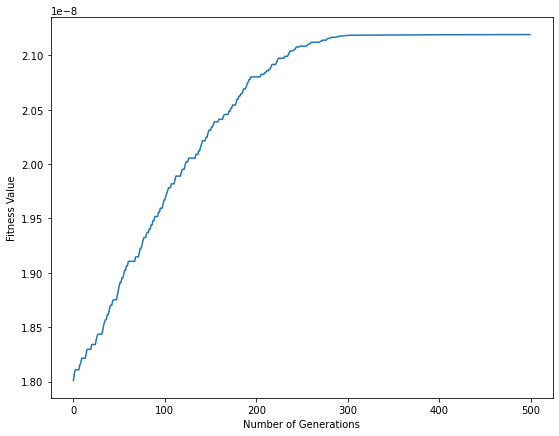

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,7))

plt.plot(best_fitnesses)

plt.xlabel('Number of Generations')
plt.ylabel('Fitness Value')

plt.savefig('fitness-values.png')

In [20]:
final_electricity = np.sum(best_solution[0][0]*X, axis = 1)

In [21]:
error = target['Consumption'] - final_electricity
day = np.arange(len(error))
day1 = np.arange(len(error) - 1)

error_per = ((target['Consumption'] - final_electricity)/final_electricity)*100

error_per = abs(error_per)

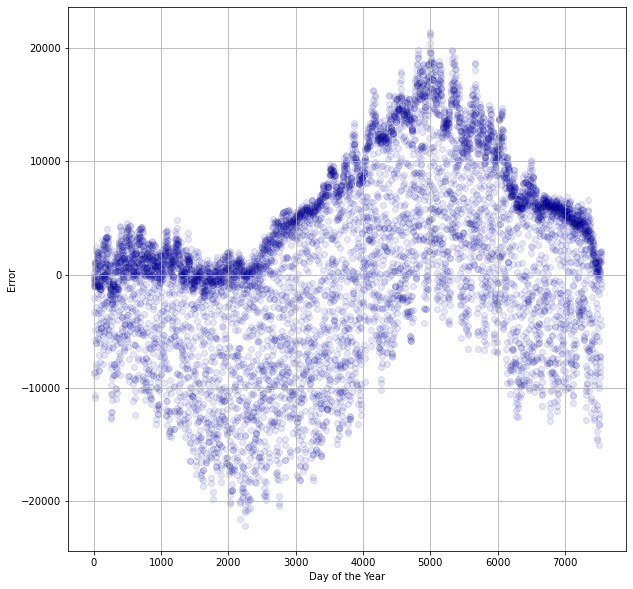

In [22]:
plt.figure(figsize=(10,10))

plt.scatter(day, error, alpha = 0.1, edgecolors= 'black', c = 'blue')

plt.xlabel('Day of the Year')
plt.ylabel('Error')
plt.grid()

plt.savefig('error.png')

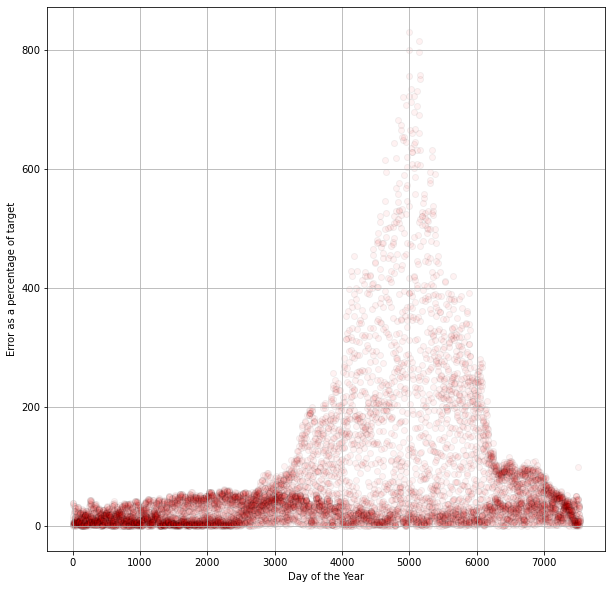

In [23]:
plt.figure(figsize=(10,10))

plt.scatter(day, error_per, alpha = 0.05, edgecolors= 'black', c = 'red')

plt.xlabel('Day of the Year')
plt.ylabel('Error as a percentage of target')
plt.grid()

plt.savefig('error-perc.png')

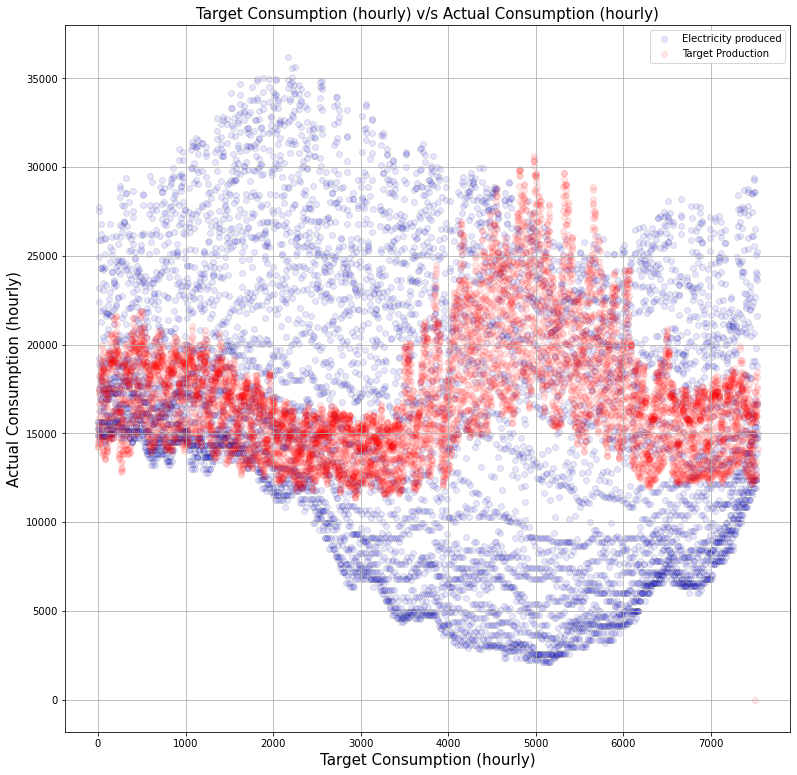

In [24]:
plt.figure(figsize=(13,13))

plt.scatter(x = day, y = final_electricity, alpha = 0.1, edgecolors= 'black', 
            label = 'Electricity produced', c = 'blue')

plt.scatter(day, target['Consumption'], label = 'Target Production', c = 'red', alpha = 0.1)

plt.xlabel('Target Consumption (hourly)', size = 15)
plt.ylabel('Actual Consumption (hourly)', size = 15)
plt.title('Target Consumption (hourly) v/s Actual Consumption (hourly)' , size = 15)

plt.legend()

plt.grid()

plt.savefig('100-gen.png')

In [25]:
type(best_solution[0])

numpy.ndarray

In [26]:
ploting_solution = best_solution[0][0] 

In [27]:
x = pd.DataFrame(min_values).transpose()
names = x.index
values = pd.DataFrame(ploting_solution)

values = values

values = values.astype(int)

d = {'names':names, 'values': values}

final_portfolio = pd.DataFrame()

final_portfolio['names'] = names
final_portfolio['values'] = values



In [28]:
final_portfolio.index = final_portfolio.names
final_portfolio

,names,values
names,,
AWT26_Power(albany),AWT26_Power(albany),50
AWP_200_Power(albany),AWP_200_Power(albany),216
D2CF_200_Power(albany),D2CF_200_Power(albany),146
AN_Bonus_150/30_Power(albany),AN_Bonus_150/30_Power(albany),164
Aria_20_Power(albany),Aria_20_Power(albany),981
WWD-1_D64_Power(albany),WWD-1_D64_Power(albany),43
Solar_AllMax(albany),Solar_AllMax(albany),68
Solar_TrinaSolar(albany),Solar_TrinaSolar(albany),104
Solar_Mitsubishi(albany),Solar_Mitsubishi(albany),18


Text(0, 0.5, 'Renewable Units of Each')

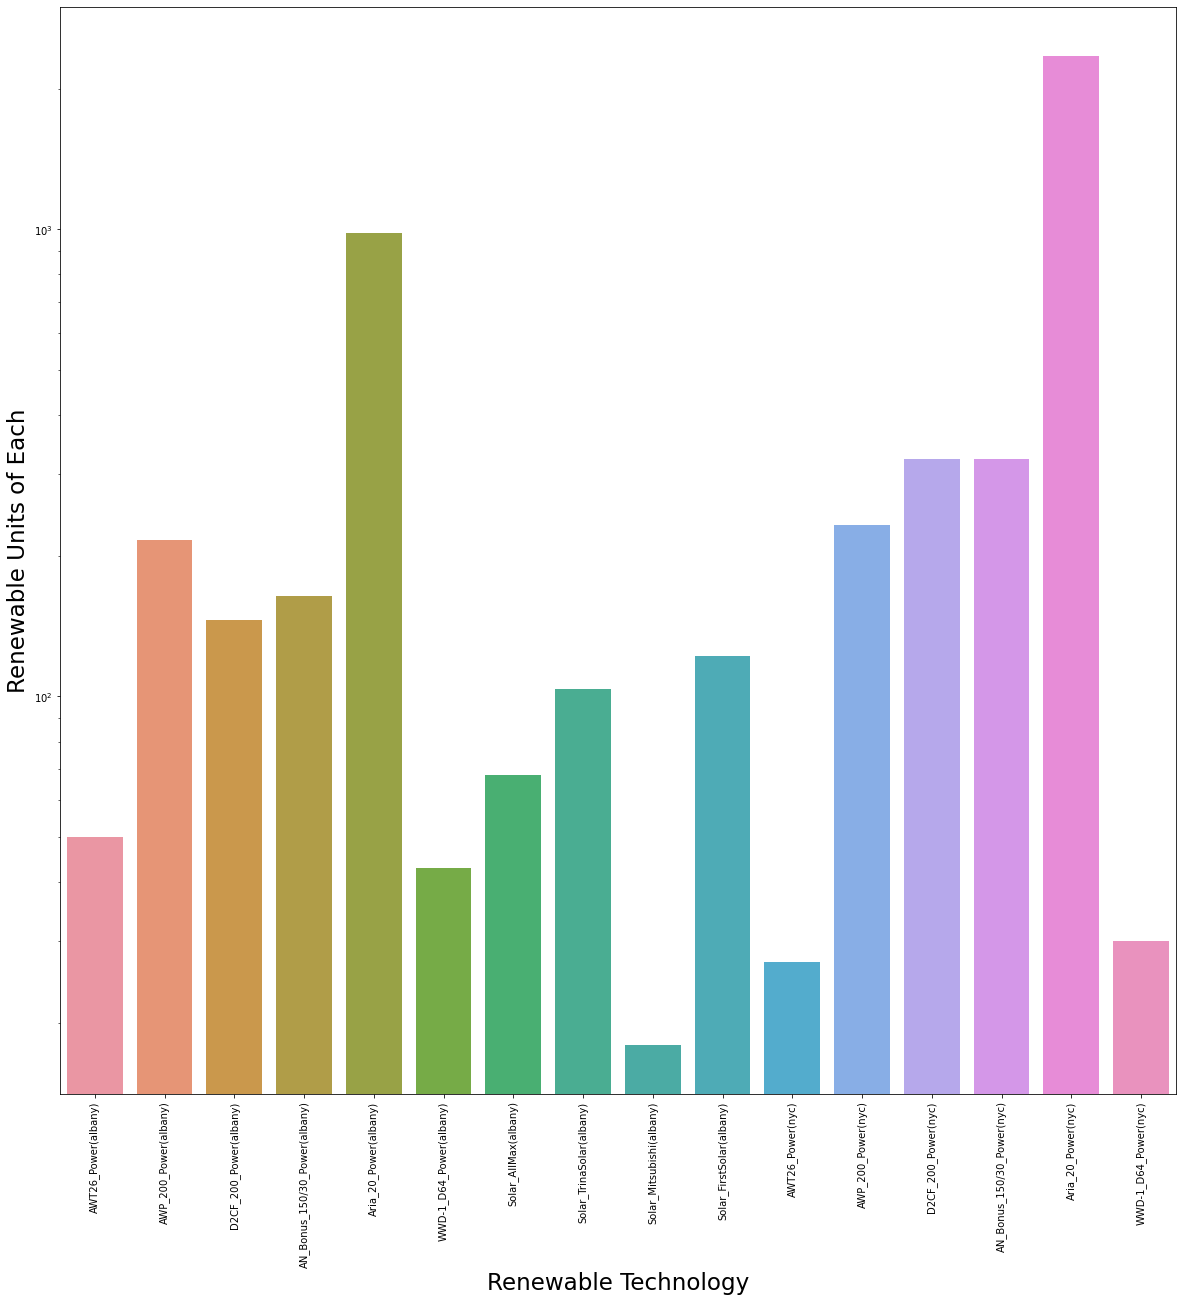

In [29]:
plt.figure(figsize=(20,20))

import seaborn as sns
#sns.set_theme(style="whitegrid")
g = sns.barplot(x="names", y="values", data= final_portfolio);
g.set_yscale("log")
plt.xticks(rotation=90);

g.set_xlabel('Renewable Technology', size = 23)
g.set_ylabel('Renewable Units of Each', size = 23)

In [30]:
max_values

[AWT26_Power(albany)               341.0
 AWP_200_Power(albany)             325.0
 D2CF_200_Power(albany)            200.0
 AN_Bonus_150/30_Power(albany)     204.0
 Aria_20_Power(albany)            2954.0
 WWD-1_D64_Power(albany)            51.0
 Solar_AllMax(albany)              148.0
 Solar_TrinaSolar(albany)          148.0
 Solar_Mitsubishi(albany)          148.0
 Solar_FirstSolar(albany)          148.0
 AWT26_Power(nyc)                  205.0
 AWP_200_Power(nyc)                240.0
 D2CF_200_Power(nyc)               141.0
 AN_Bonus_150/30_Power(nyc)        156.0
 Aria_20_Power(nyc)               2233.0
 WWD-1_D64_Power(nyc)               37.0
 Name: 13, dtype: float64]

In [31]:
final_portfolio

,names,values
names,,
AWT26_Power(albany),AWT26_Power(albany),50
AWP_200_Power(albany),AWP_200_Power(albany),216
D2CF_200_Power(albany),D2CF_200_Power(albany),146
AN_Bonus_150/30_Power(albany),AN_Bonus_150/30_Power(albany),164
Aria_20_Power(albany),Aria_20_Power(albany),981
WWD-1_D64_Power(albany),WWD-1_D64_Power(albany),43
Solar_AllMax(albany),Solar_AllMax(albany),68
Solar_TrinaSolar(albany),Solar_TrinaSolar(albany),104
Solar_Mitsubishi(albany),Solar_Mitsubishi(albany),18


In [32]:
Corr = X.corr()

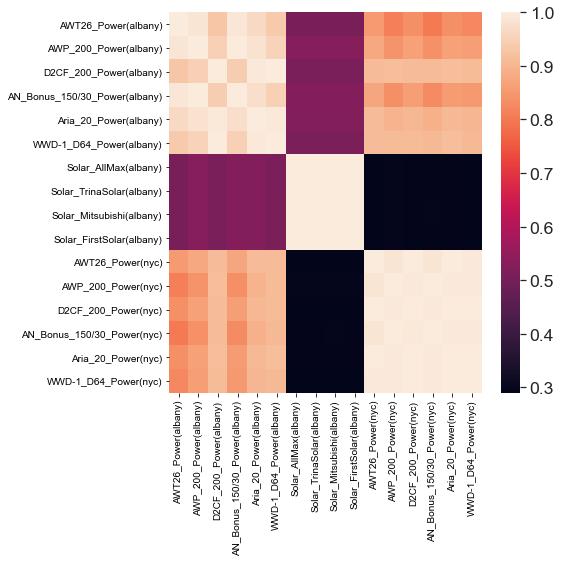

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = Corr
fig, ax=plt.subplots(figsize=(7,7))

sns.set(font_scale = 1.6)

g =sns.heatmap(corr)